In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [391]:
df = pd.read_csv(r"C:\Users\Arung\OneDrive\Desktop\Assignment\Assignments_IOT\Dataset_IOT\Cellphone.csv")
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [392]:
df.head(1)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.0,8.0,2610,7.4


In [393]:
df.tail(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [394]:
df.shape

(161, 14)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [396]:
df.dtypes

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [397]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [398]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [399]:
df.duplicated().sum()

0

In [400]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

## Column Rename

In [402]:
df.rename(columns= {'resoloution':'resolution','cpu core':'cpu_core', 
                    'internal mem':'internal_mem','cpu freq':'cpu_freq'}, inplace = True)

In [403]:
df.head(5)

,Product_id,Price,Sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [404]:
## CHECKING OUTLIERS

<Axes: ylabel='weight'>

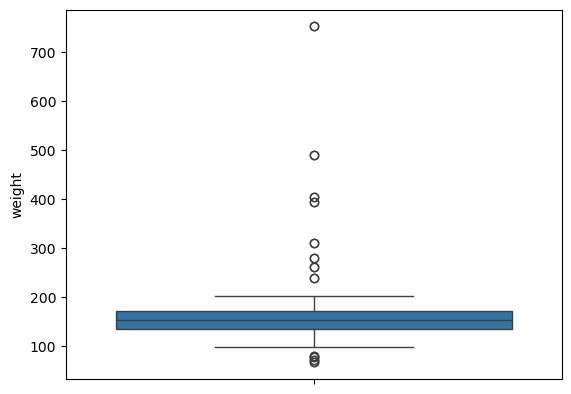

In [405]:
sns.boxplot(df["weight"])

In [406]:
df["weight"].nlargest(10)

127    753.0
128    753.0
37     489.0
40     489.0
84     404.0
90     404.0
93     393.0
95     393.0
67     310.0
72     310.0
Name: weight, dtype: float64

<Axes: ylabel='battery'>

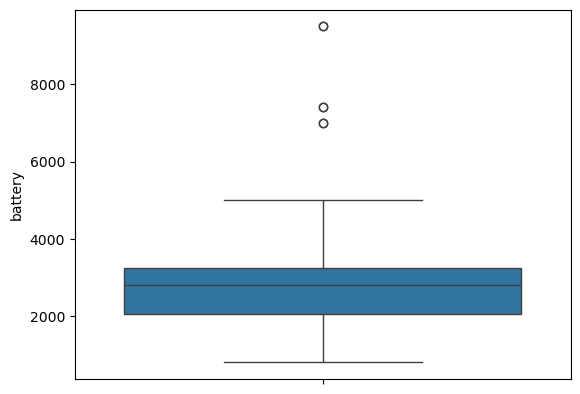

In [407]:
sns.boxplot(df["battery"])

In [408]:
df["battery"].nlargest(10)

127    9500
128    9500
37     7400
40     7400
152    7000
153    7000
116    5000
117    5000
84     4500
90     4500
Name: battery, dtype: int64

<Axes: ylabel='Price'>

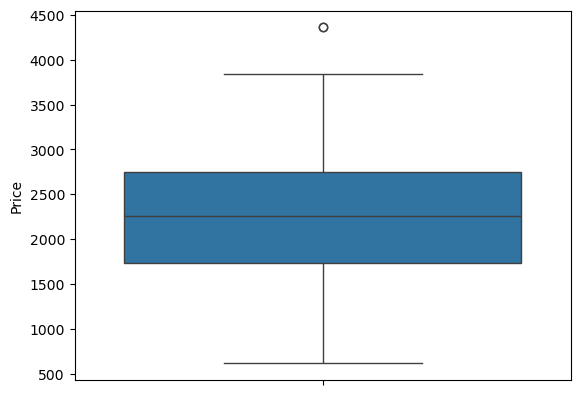

In [409]:
sns.boxplot(df["Price"])

In [410]:
df["Price"].nlargest(20)

152    4361
153    4361
83     3837
87     3837
53     3658
56     3658
155    3551
156    3551
32     3316
47     3316
116    3287
117    3287
158    3260
157    3211
159    3211
73     3116
137    3116
146    3102
147    3102
148    3055
Name: Price, dtype: int64

# DISTRIBUTION

### PRICE

<Axes: xlabel='Price', ylabel='Count'>

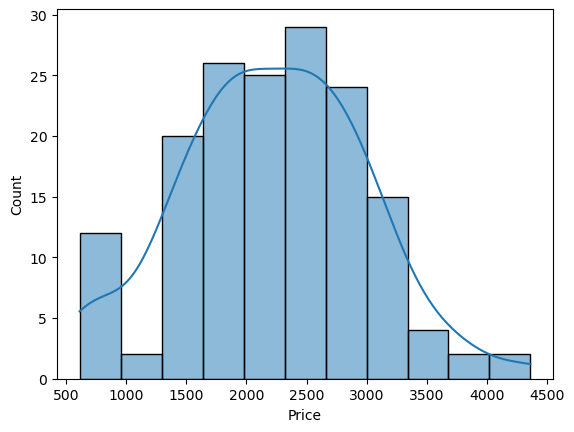

In [413]:
sns.histplot(data=df, x='Price', kde=True)

In [414]:
### SALES

<Axes: xlabel='Sale', ylabel='Count'>

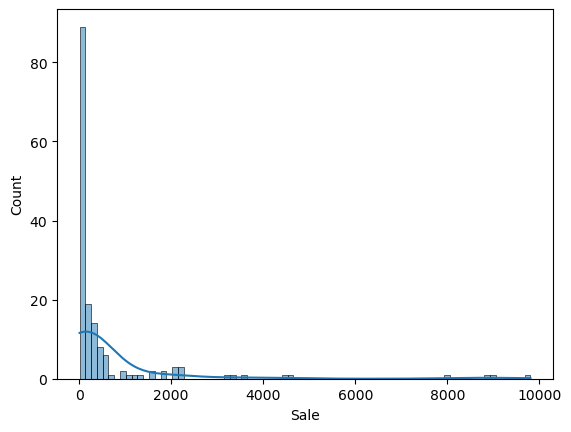

In [415]:
sns.histplot(data=df, x='Sale', kde=True)

In [416]:
df.drop(columns=["Product_id"], inplace = True)

In [417]:
df

,Price,Sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [418]:
df.corr()

,Price,Sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resolution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu_freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal_mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
RearCam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


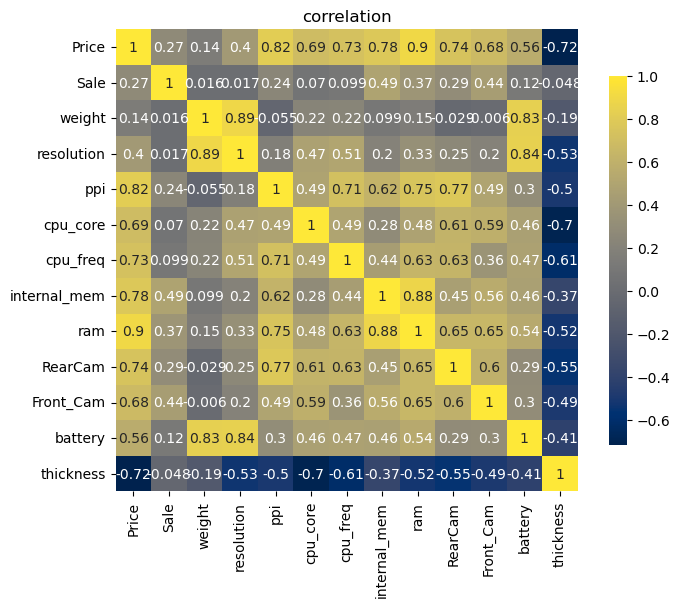

In [419]:
correlation_matrix = df.corr()
plt.figure(figsize =(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap="cividis",square = True,  cbar_kws={"shrink": .8})
plt.title("correlation")
plt.show()


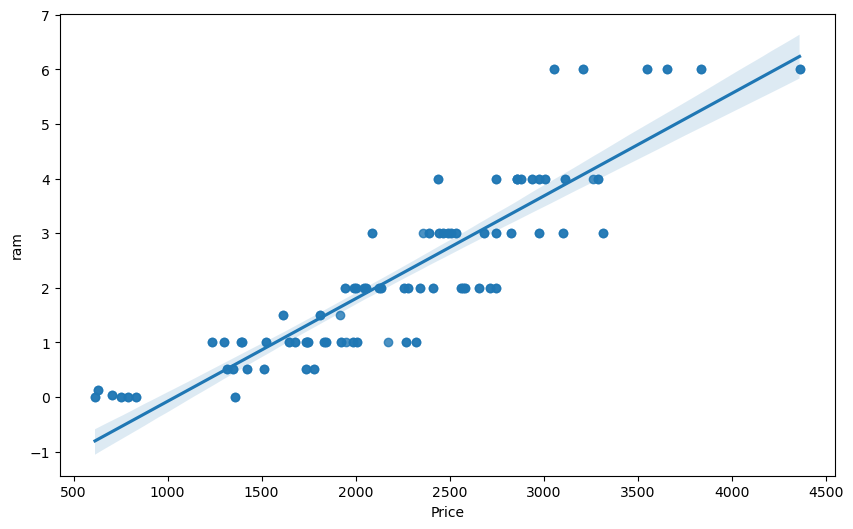

In [420]:
plt.figure(figsize=(10,6))
sns.regplot(x = df['Price'], y = df['ram'])
plt.show() 

In [421]:
# Spliting the df1 in x and Y
# X= independent Variable
# y = dependent (charges)

In [422]:
x = df.drop(columns=["Price"])
y = df["Price"]

In [423]:
x

,Sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [424]:
y

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64

In [425]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size = 0.70, random_state =42)

In [426]:
x_train.shape ,y_train.shape, x_test.shape, y_test.shape

((112, 12), (112,), (49, 12), (49,))

In [427]:
model = LinearRegression()
model

LinearRegression()

In [428]:
model.fit(x_train, y_train)

LinearRegression()

In [429]:
# prediction
y_predict = model.predict(x_test)
y_predict

array([ 899.21905669, 1865.8018963 , 2628.56815836, 1506.3810264 ,
       1614.46133409, 1852.82915599,  899.47246267, 1303.3169097 ,
       2398.19755811, 2627.42783148, 1394.12226803, 1602.82814555,
       1732.11034516, 2866.26078059, 2266.83076127, 2230.65374919,
       2515.51576236, 3016.35998654, 1439.74223967, 2230.84380368,
       2320.30199929, 1732.06811084, 1932.75150888, 2463.39634251,
       3117.50347114, 4148.21011223, 2439.92861692, 3429.42483309,
       2678.4509844 , 2520.34587361, 3069.5689513 , 2571.80586926,
       2581.33018323, 2779.26210015, 2018.38401302, 1852.39345474,
       2051.44058649, 1578.17977476, 2449.42077761, 1602.23686495,
       1843.26295536, 2362.51580831, 2943.6369355 , 2439.94973408,
       1384.27881237, 2266.61958962,  965.18279702, 3117.5879398 ,
       1728.57935353])

In [430]:
# SCORE
model.score(x_train,y_train)
model.score(x_test,y_test)

0.9539561704745615

In [431]:
# PERFORMANCE MATRICS
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
r2=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
R_mse = sqrt(mse)
print(r2* 100)
print(mse)
print(R_mse)

95.39561704745616
22672.80342849788
150.57490969114966


In [432]:
res = pd.DataFrame({"actual" : y_test, "predicted" : y_predict})
res

,actual,predicted
105,833,899.219057
108,1676,1865.801896
142,2508,2628.568158
55,1777,1506.381026
94,1511,1614.461334
29,1950,1852.829156
101,833,899.472463
51,1347,1303.316910
100,2343,2398.197558
143,2508,2627.427831


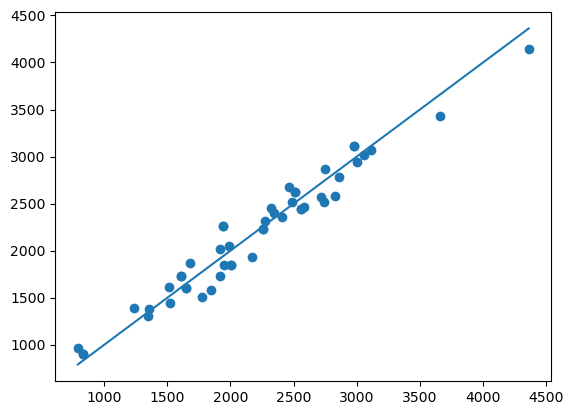

In [433]:
plt.scatter(y_test , y_predict)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)])
plt.show()

In [434]:
# Lasso regularisation 

lasso = Lasso(alpha=0.1)  
lasso

Lasso(alpha=0.1)

In [435]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [436]:
y_pre = lasso.predict(x_test)
y_pre

array([ 899.77172631, 1866.18374046, 2627.01054585, 1506.82848487,
       1614.32182382, 1852.96180046,  900.02469227, 1304.59138712,
       2396.7612002 , 2625.87219905, 1393.83687762, 1602.40168146,
       1733.04477371, 2866.93167883, 2266.01525662, 2229.81484742,
       2513.99332526, 3016.191669  , 1440.47868373, 2230.00457188,
       2320.39598665, 1733.00261272, 1932.93724546, 2462.09721954,
       3116.46932643, 4147.71719042, 2440.00564164, 3427.2524544 ,
       2678.00254204, 2520.6860332 , 3069.92580706, 2571.65795816,
       2581.69813999, 2779.51443287, 2018.84051968, 1853.5500368 ,
       2052.08641949, 1577.99327475, 2448.76756524, 1601.81142756,
       1843.60540265, 2361.58630533, 2943.72397895, 2440.02672213,
       1384.41361837, 2265.80445165,  963.80004422, 3116.55364842,
       1729.35077937])

In [437]:
# SCORE
lasso.score(x_train,y_train)


0.9526608512818235

In [438]:
lasso.score(x_test,y_test)

0.9540528936035346

In [439]:
# PERFORMANCE MATRICS
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
r2=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
R_mse = sqrt(mse)
print(r2)
print(mse)
print(R_mse)

0.9539561704745615
22672.80342849788
150.57490969114966


In [440]:
# SCORE
model.score(x_train,y_train)

0.9526614902100643

In [441]:
model.score(x_test,y_test)

0.9539561704745615

In [442]:
# Ridge
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter

ridge


Ridge()

In [443]:
ridge.fit(x_train, y_train)

Ridge()

In [444]:
# Predict
y_pred = ridge.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 22214.180506101653
Root Mean Squared Error: 149.0442233234876
R² Score: 0.9548875398891055


In [445]:
# SCORE
ridge.score(x_train,y_train)

0.9525998097323987

In [446]:
ridge.score(x_test,y_test)

0.9548875398891055

In [447]:
# Elastic_net

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

elastic_net


ElasticNet()

In [448]:
elastic_net.fit(x_train, y_train)

ElasticNet()

In [449]:
# Predict
y_pred = elastic_net.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


# Coefficients
print('Coefficients:', elastic_net.coef_)

Mean Squared Error: 24560.51649308273
Root Mean Squared Error: 156.7179520446931
R² Score: 0.9501226110820146
Coefficients: [-2.58293297e-02 -1.61653167e+00  1.47846117e+00  1.47758389e+00
  3.95894483e+01  2.49668093e+01  7.28391304e+00  4.00226425e+01
  6.87038267e+00  1.17790250e+01  1.63673431e-01 -5.86560903e+01]
